# Exploratory Data Analysis on Weather Report

About The Dataset:

This dataset contains daily weather observations from numerous Australian weather stations over a
11-Year period. This data set have 23 features and 100000 observations

# Basic Requirements

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset:

In [158]:
weather=pd.read_csv("C:\\Users\\mutha\\Downloads\\Weather_Exercise-20220207T133949Z-001\\Weather_Exercise\weather_data.csv")

In [159]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No


# Cleaning and Processing The Dataset

* Dataset Information

In [160]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           100000 non-null  object 
 1   Location       100000 non-null  object 
 2   MinTemp        99564 non-null   float64
 3   MaxTemp        99784 non-null   float64
 4   Rainfall       99030 non-null   float64
 5   Evaporation    57367 non-null   float64
 6   Sunshine       52518 non-null   float64
 7   WindGustDir    93419 non-null   object 
 8   WindGustSpeed  93460 non-null   float64
 9   WindDir9am     92938 non-null   object 
 10  WindDir3pm     97309 non-null   object 
 11  WindSpeed9am   99062 non-null   float64
 12  WindSpeed3pm   98146 non-null   float64
 13  Humidity9am    98762 non-null   float64
 14  Humidity3pm    97456 non-null   float64
 15  Pressure9am    90163 non-null   float64
 16  Pressure3pm    90188 non-null   float64
 17  Cloud9am       62372 non-null 

* Check Null Values

In [161]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp            436
MaxTemp            216
Rainfall           970
Evaporation      42633
Sunshine         47482
WindGustDir       6581
WindGustSpeed     6540
WindDir9am        7062
WindDir3pm        2691
WindSpeed9am       938
WindSpeed3pm      1854
Humidity9am       1238
Humidity3pm       2544
Pressure9am       9837
Pressure3pm       9812
Cloud9am         37628
Cloud3pm         40011
Temp9am            620
Temp3pm           1910
RainToday          970
RainTomorrow         0
dtype: int64

In [162]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,99564.000000,99784.000000,99030.000000,57367.000000,52518.000000,93460.000000,99062.000000,98146.000000,98762.000000,97456.000000,90163.000000,90188.000000,62372.000000,59989.000000,99380.000000,98090.000000
mean,12.190559,23.228404,2.346882,5.467535,7.627004,39.986818,14.008045,18.623846,68.845599,51.491155,1017.631809,1015.242128,4.432261,4.502492,16.986879,21.685637
std,6.412850,7.117851,8.357515,4.186620,3.783709,13.589459,8.898406,8.797918,19.064754,20.824180,7.105450,7.032167,2.887452,2.721770,6.500404,6.940969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,47.300000,278.400000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.700000


* Removing Null_Values

In [163]:
weather["MinTemp"].fillna(weather["MinTemp"].value_counts().index[0],inplace=True)
weather["MaxTemp"].fillna(weather["MaxTemp"].value_counts().index[0],inplace=True)
weather["Rainfall"].fillna(weather["Rainfall"].value_counts().index[0],inplace=True)
weather["Evaporation"].fillna(weather["Evaporation"].value_counts().index[0],inplace=True)
weather["Sunshine"].fillna(weather["Sunshine"].value_counts().index[0],inplace=True)
weather["WindGustDir"].fillna(weather["WindGustDir"].value_counts().index[0],inplace=True)
weather["WindGustSpeed"].fillna(weather["WindGustSpeed"].value_counts().index[0],inplace=True)
weather["WindDir9am"].fillna(weather["WindDir9am"].value_counts().index[0],inplace=True)
weather["WindDir3pm"].fillna(weather["WindDir3pm"].value_counts().index[0],inplace=True)
weather["WindSpeed9am"].fillna(weather["WindSpeed9am"].value_counts().index[0],inplace=True)
weather["WindSpeed3pm"].fillna(weather["WindSpeed3pm"].value_counts().index[0],inplace=True)
weather["Humidity9am"].fillna(weather["Humidity9am"].value_counts().index[0],inplace=True)
weather["Humidity3pm"].fillna(weather["Humidity3pm"].value_counts().index[0],inplace=True)
weather["Pressure9am"].fillna(weather["Pressure9am"].value_counts().index[0],inplace=True)
weather["Pressure3pm"].fillna(weather["Pressure3pm"].value_counts().index[0],inplace=True)
weather["Cloud9am"].fillna(weather["Cloud9am"].value_counts().index[0],inplace=True)
weather["Cloud3pm"].fillna(weather["Cloud3pm"].value_counts().index[0],inplace=True)
weather["Temp9am"].fillna(weather["Temp9am"].value_counts().index[0],inplace=True)
weather["Temp3pm"].fillna(weather["Temp3pm"].value_counts().index[0],inplace=True)
weather["RainToday"].fillna(weather["RainToday"].value_counts().index[0],inplace=True)

<AxesSubplot:>

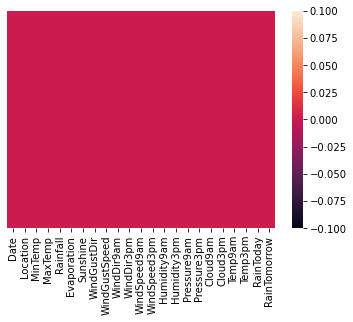

In [164]:
sns.heatmap(weather.isnull(),yticklabels=False,cbar=True)

Changing Date Format

In [165]:
weather["Date"]=pd.to_datetime(weather["Date"])

In [166]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           100000 non-null  datetime64[ns]
 1   Location       100000 non-null  object        
 2   MinTemp        100000 non-null  float64       
 3   MaxTemp        100000 non-null  float64       
 4   Rainfall       100000 non-null  float64       
 5   Evaporation    100000 non-null  float64       
 6   Sunshine       100000 non-null  float64       
 7   WindGustDir    100000 non-null  object        
 8   WindGustSpeed  100000 non-null  float64       
 9   WindDir9am     100000 non-null  object        
 10  WindDir3pm     100000 non-null  object        
 11  WindSpeed9am   100000 non-null  float64       
 12  WindSpeed3pm   100000 non-null  float64       
 13  Humidity9am    100000 non-null  float64       
 14  Humidity3pm    100000 non-null  float64       
 15  P

# Tasks to be carried out:

# 1.Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill.
  Also find the sunny places to setup a solar field. 
  Take values more than 75 percentile as minimum values for analysis

In [167]:
weather["windspeed"]=(weather["WindSpeed9am"]+weather["WindSpeed3pm"])/2

In [168]:
weather["windspeed"]

0        13.0
1        16.0
2         6.5
3        28.0
4        11.0
         ... 
99995    26.0
99996    50.5
99997    11.0
99998    11.0
99999    13.0
Name: windspeed, Length: 100000, dtype: float64

In [169]:
W=weather["windspeed"].quantile(.75)

In [170]:
weather1=weather[weather["windspeed"]>W]

In [171]:
weather1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed
3,2012-11-21,Wollongong,13.8,22.8,0.0,4.0,0.0,SSW,70.0,N,...,76.0,1017.0,1010.6,7.0,7.0,18.9,20.6,No,No,28.0
10,2012-03-31,Dartmoor,11.1,21.8,0.0,7.0,8.1,WNW,39.0,W,...,51.0,1012.7,1014.5,7.0,7.0,16.9,19.7,No,No,23.0
12,2012-02-26,Ballarat,20.6,32.3,0.0,4.0,0.0,N,65.0,NNE,...,47.0,1012.5,1009.4,1.0,6.0,23.7,28.7,No,Yes,38.0
16,2014-04-11,Mildura,12.5,33.9,0.0,7.6,11.5,SW,48.0,N,...,6.0,1016.7,1013.0,1.0,7.0,23.6,31.9,No,No,24.0
20,2009-04-26,MelbourneAirport,7.2,13.1,1.8,5.2,4.2,W,81.0,NNW,...,69.0,997.8,999.0,7.0,7.0,9.5,11.2,Yes,Yes,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,2014-08-10,Sale,7.4,17.7,0.2,4.0,0.0,W,52.0,W,...,55.0,1019.7,1019.4,1.0,6.0,12.8,16.6,No,No,27.5
99993,2010-07-05,MelbourneAirport,8.3,19.7,0.0,2.4,0.7,N,41.0,N,...,57.0,1021.1,1018.5,7.0,7.0,12.8,19.1,No,Yes,23.0
99994,2014-06-16,Uluru,4.0,17.8,0.0,4.0,0.0,E,44.0,ESE,...,35.0,1028.8,1025.3,7.0,7.0,8.6,17.0,No,No,22.5
99995,2013-01-27,AliceSprings,17.6,34.4,0.0,15.6,12.9,SE,44.0,SE,...,11.0,1011.1,1006.4,1.0,1.0,25.6,33.5,No,No,26.0


In [172]:
weather1["windspeed"].sort_values(ascending=False).head(5)

19347    83.0
75102    71.5
87511    69.5
66238    69.5
49734    69.0
Name: windspeed, dtype: float64

The hightest wind speed recorded is 83

In [173]:
weather1[weather1["windspeed"]==83]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed
19347,2009-09-23,Newcastle,16.4,19.5,0.0,4.0,0.0,W,35.0,NW,...,38.0,1016.4,1015.5,0.0,2.0,16.6,19.0,No,No,83.0


The windspeed is high in Newcastle.

In [174]:
weather["Frequency"]=weather.groupby(["Location"])["windspeed"].transform("mean")

In [175]:
weather["Frequency"]

0        17.586072
1        18.511535
2        12.465297
3        19.266208
4        19.701208
           ...    
99995    16.454629
99996    20.689852
99997    22.008895
99998    15.016428
99999    12.645112
Name: Frequency, Length: 100000, dtype: float64

In [176]:
weather.groupby(["Location"])["windspeed"].value_counts().sort_values(ascending=False).head(5)

Location      windspeed
Newcastle     6.5          308
              11.0         259
Canberra      11.0         244
CoffsHarbour  11.0         235
Brisbane      6.5          225
Name: windspeed, dtype: int64

The high frequent speed winds are recorded in Newcastle on the count of 308

Therefore,Building The windmill in Newcastle is the Better choice

In [177]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,0.0,NNE,31.0,SW,...,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No,13.0,17.586072
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes,16.0,18.511535
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No,6.5,12.465297
3,2012-11-21,Wollongong,13.8,22.8,0.0,4.0,0.0,SSW,70.0,N,...,1017.0,1010.6,7.0,7.0,18.9,20.6,No,No,28.0,19.266208
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No,11.0,19.701208


In [178]:
weather["Temp"]=(weather["Temp9am"]+weather["Temp3pm"])/2

In [179]:
weather["Temp"]

0        22.85
1        17.90
2        18.20
3        19.75
4        23.65
         ...  
99995    29.55
99996    14.10
99997    23.30
99998    18.00
99999    18.85
Name: Temp, Length: 100000, dtype: float64

In [180]:
A=weather["Temp"].quantile(.75)

In [181]:
wt=weather[weather["Temp"]>A]

In [182]:
wt.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency,Temp
7,2016-02-24,Moree,19.9,35.0,0.0,10.2,12.5,NNE,37.0,N,...,1013.3,0.0,1.0,24.2,34.4,No,No,16.5,17.190559,29.30
12,2012-02-26,Ballarat,20.6,32.3,0.0,4.0,0.0,N,65.0,NNE,...,1009.4,1.0,6.0,23.7,28.7,No,Yes,38.0,21.555266,26.20
16,2014-04-11,Mildura,12.5,33.9,0.0,7.6,11.5,SW,48.0,N,...,1013.0,1.0,7.0,23.6,31.9,No,No,24.0,15.336962,27.75
19,2015-09-10,Nuriootpa,11.2,33.8,0.0,5.8,8.7,N,48.0,ENE,...,1023.8,2.0,7.0,23.7,29.5,No,Yes,15.0,16.100473,26.60
26,2013-01-25,Penrith,19.8,35.3,0.0,4.0,0.0,ENE,37.0,N,...,1015.5,7.0,7.0,24.3,33.6,No,No,7.5,9.193062,28.95


In [183]:
wt["Temp"].max()

41.599999999999994

The maximum temperature measured is 41.599999999999994

In [184]:
wt[wt["Temp"]==41.599999999999994]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency,Temp
13352,2009-07-02,Woomera,31.4,46.2,0.0,22.0,12.6,NNW,61.0,NW,...,1003.0,1.0,1.0,37.9,45.3,No,No,26.0,20.238913,41.6


The place is found to have Maximum Temperature is Woomera

In [185]:
weather1["Temp"]=weather.groupby(["Location"])["Temp"].transform("mean")

C:\Users\mutha\AppData\Local\Temp/ipykernel_3708/2936107090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather1["Temp"]=weather.groupby(['Location'])['Temp'].transform('mean')


In [186]:
wt=weather1.groupby(["Location"])["Temp"].value_counts().sort_values(ascending=False).head(20)

In [187]:
wt

Location          Temp     
Ballarat          14.185887    1081
GoldCoast         23.082949    1081
SydneyAirport     20.156039    1040
NorfolkIsland     20.086043    1005
MelbourneAirport  16.633769     987
MountGambier      15.958337     904
Townsville        26.744099     889
Woomera           21.533977     885
PerthAirport      21.447732     868
Wollongong        19.134160     773
Cairns            26.838621     769
Melbourne         16.988455     765
Portland          14.879520     675
Hobart            14.307044     665
Sale              16.004906     647
Williamtown       20.506102     630
PearceRAAF        21.726142     616
NorahHead         19.653737     586
CoffsHarbour      21.214345     585
Darwin            29.127905     576
Name: Temp, dtype: int64

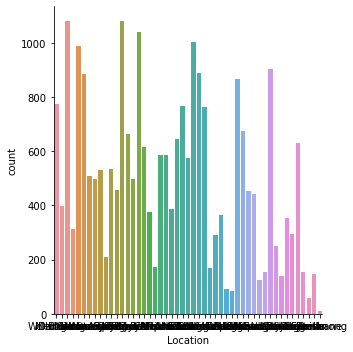

In [188]:
sns.catplot(x = "Location", kind = "count", data = weather1)

The perfect place to buiit the solarpower plant are GoldCoast,SydneyAirport,NorfolkIsland,Townsville,Woomera, PerthAirport

# 2.Find the locations where humidity and temperature are more than 80 percentile value

In [189]:
weather["Humidity"]=(weather["Humidity9am"]+weather["Humidity3pm"])/2

In [190]:
H=weather["Humidity"].quantile(.80)
H

76.0

In [191]:
A1=weather["Temp"].quantile(.80)
A1

25.0

In [192]:
wh=weather[(weather["Humidity"]>H)&(weather["Temp"]>A1)]

In [193]:
wh.Location.unique()

array(['GoldCoast', 'Darwin', 'Cairns', 'Townsville', 'Williamtown',
       'NorfolkIsland', 'Katherine', 'SydneyAirport', 'NorahHead',
       'Brisbane', 'Sydney', 'Newcastle', 'PearceRAAF', 'AliceSprings',
       'Wollongong', 'BadgerysCreek', 'Uluru', 'CoffsHarbour', 'Moree',
       'Penrith', 'Canberra', 'Albany', 'WaggaWagga', 'MelbourneAirport',
       'Woomera', 'Richmond', 'Walpole', 'PerthAirport', 'Cobar',
       'Portland', 'Watsonia'], dtype=object)

In [194]:
wh[["Location","Temp","Humidity"]]

,Location,Temp,Humidity
37,GoldCoast,25.20,87.0
45,Darwin,27.60,81.5
110,Cairns,26.80,81.0
170,Darwin,28.00,79.5
364,Darwin,27.80,87.5
...,...,...,...
99688,Townsville,26.95,80.0
99769,Cairns,28.65,80.5
99790,Darwin,28.15,83.0
99904,Darwin,29.00,76.5


The Location where both the humidity and Temperature are greater than 80 percentiles are
["GoldCoast", "Darwin", "Cairns", "Townsville", "Williamtown",
       "NorfolkIsland", "Katherine", "SydneyAirport", "NorahHead",
       "Brisbane", "Sydney", "Newcastle", "PearceRAAF", "AliceSprings",
       "Wollongong", "BadgerysCreek", "Uluru", "CoffsHarbour", "Moree",
       "Penrith", "Canberra", "Albany", "WaggaWagga", "MelbourneAirport",
       "Woomera", "Richmond", "Walpole", "PerthAirport", "Cobar",
       "Portland", "Watsonia"]

# 3.Find 3 places where rainfall, sunshine, humidity is not too high or too low [ Use logical threshold using percentile values]

In [195]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency,Temp,Humidity
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,0.0,NNE,31.0,SW,...,7.0,4.0,21.5,24.2,Yes,No,13.0,17.586072,22.85,71.0
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,7.0,8.0,14.0,21.8,No,Yes,16.0,18.511535,17.90,51.0
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,2.0,7.0,12.8,23.6,No,No,6.5,12.465297,18.20,49.5
3,2012-11-21,Wollongong,13.8,22.8,0.0,4.0,0.0,SSW,70.0,N,...,7.0,7.0,18.9,20.6,No,No,28.0,19.266208,19.75,70.5
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1.0,1.0,21.7,25.6,No,No,11.0,19.701208,23.65,53.5


In [196]:
weather[["Location","Rainfall","Sunshine","Humidity"]].head()

,Location,Rainfall,Sunshine,Humidity
0,CoffsHarbour,2.2,0.0,71.0
1,Portland,0.0,0.4,51.0
2,Watsonia,0.0,10.9,49.5
3,Wollongong,0.0,0.0,70.5
4,Townsville,0.0,10.2,53.5


In [197]:
r1=weather["Rainfall"].quantile(.30)

In [198]:
r2=weather["Rainfall"].quantile(.70)

In [199]:
r3=weather["Rainfall"].quantile(.71)

In [200]:
s1=weather["Sunshine"].quantile(.30)

In [201]:
s2=weather["Sunshine"].quantile(.70)

In [202]:
s3=weather["Sunshine"].quantile(.71)

In [203]:
h1=weather["Humidity"].quantile(.30)

In [204]:
h2=weather["Humidity"].quantile(.70)

In [205]:
h3=weather["Humidity"].quantile(.71)

In [206]:
weather[(weather["Rainfall"]>r1)&(weather["Rainfall"]<r2)&(weather["Sunshine"]>s1)&(weather["Sunshine"]<s2)&
       (weather["Humidity"]>h1)&(weather["Humidity"]<h2)]["Location"].unique()

array(['Albany', 'Nuriootpa'], dtype=object)

In [207]:
weather[(weather["Rainfall"]==r3)&(weather["Sunshine"]==s3)&(weather["Humidity"]==h3)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency,Temp,Humidity


In [208]:
"""weather[(weather["Rainfall"]>r1)&(weather["Rainfall"]<r3)&(weather["Sunshine"]>s1)&(weather["Sunshine"]<s3)&
       (weather["Humidity"]>h1)&(weather["Humidity"]<h3)]["Location"].median()
python -W warningsexample.py"""

'weather[(weather["Rainfall"]>r1)&(weather["Rainfall"]<r3)&(weather["Sunshine"]>s1)&(weather["Sunshine"]<s3)&\n       (weather["Humidity"]>h1)&(weather["Humidity"]<h3)]["Location"].median()\npython -W warningsexample.py'

The places where rainfall, humidity and sunshile fall moderate are "Albany", "Nuriootpa","Sydney"

# 4.	Find the top 3 places where rainfall is high, but cloud cover is low and vice versa. Take cloud cover avg>5.

In [209]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency,Temp,Humidity
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,0.0,NNE,31.0,SW,...,7.0,4.0,21.5,24.2,Yes,No,13.0,17.586072,22.85,71.0
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,7.0,8.0,14.0,21.8,No,Yes,16.0,18.511535,17.90,51.0
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,2.0,7.0,12.8,23.6,No,No,6.5,12.465297,18.20,49.5
3,2012-11-21,Wollongong,13.8,22.8,0.0,4.0,0.0,SSW,70.0,N,...,7.0,7.0,18.9,20.6,No,No,28.0,19.266208,19.75,70.5
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1.0,1.0,21.7,25.6,No,No,11.0,19.701208,23.65,53.5


In [210]:
weather["Cloud"]=(weather["Cloud9am"]+weather["Cloud3pm"])/2

In [211]:
weather["Cloud"]

0        5.5
1        7.5
2        4.5
3        7.0
4        1.0
        ... 
99995    1.0
99996    7.0
99997    5.0
99998    7.0
99999    7.0
Name: Cloud, Length: 100000, dtype: float64

In [212]:
wc=weather[weather["Cloud"]>5]

In [213]:
wc.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency,Temp,Humidity,Cloud
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,0.0,NNE,31.0,SW,...,4.0,21.5,24.2,Yes,No,13.0,17.586072,22.85,71.0,5.5
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,8.0,14.0,21.8,No,Yes,16.0,18.511535,17.90,51.0,7.5
3,2012-11-21,Wollongong,13.8,22.8,0.0,4.0,0.0,SSW,70.0,N,...,7.0,18.9,20.6,No,No,28.0,19.266208,19.75,70.5,7.0
9,2016-08-07,Penrith,12.5,16.9,0.8,4.0,0.0,SW,26.0,SSW,...,7.0,13.3,13.1,No,Yes,6.5,9.193062,13.20,94.0,7.0
10,2012-03-31,Dartmoor,11.1,21.8,0.0,7.0,8.1,WNW,39.0,W,...,7.0,16.9,19.7,No,No,23.0,14.611408,18.30,65.0,7.0


In [214]:
R1=wc["Rainfall"].quantile(.100)

In [215]:
C1=wc["Cloud"].quantile(.1)

In [216]:
Top3H=wc[(wc["Rainfall"]>R1)&(wc["Cloud"]<C1)&(wc["Sunshine"]==0)]["Location"].unique()

In [217]:
Top3H

array(['CoffsHarbour', 'Newcastle', 'Albury', 'Ballarat', 'Uluru',
       'Richmond', 'Bendigo', 'AliceSprings', 'Cobar', 'Townsville',
       'Canberra', 'Albany', 'Katherine', 'Portland', 'Wollongong',
       'Cairns', 'Launceston', 'MountGambier', 'Sale', 'NorfolkIsland',
       'MelbourneAirport', 'Hobart', 'WaggaWagga', 'Williamtown',
       'Nuriootpa', 'Moree', 'Mildura', 'Woomera'], dtype=object)

The top 3 locations where rainfall is high and humidity less than average are CoffsHarbour", "Newcastle", "Albury"

# 5.	Which wind direction causes more rains in different cities?

In [218]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency,Temp,Humidity,Cloud
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,0.0,NNE,31.0,SW,...,4.0,21.5,24.2,Yes,No,13.0,17.586072,22.85,71.0,5.5
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,8.0,14.0,21.8,No,Yes,16.0,18.511535,17.90,51.0,7.5
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,7.0,12.8,23.6,No,No,6.5,12.465297,18.20,49.5,4.5
3,2012-11-21,Wollongong,13.8,22.8,0.0,4.0,0.0,SSW,70.0,N,...,7.0,18.9,20.6,No,No,28.0,19.266208,19.75,70.5,7.0
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1.0,21.7,25.6,No,No,11.0,19.701208,23.65,53.5,1.0


In [219]:
aa=weather.groupby("WindGustDir")["Rainfall"].max()
aa

WindGustDir
E      247.2
ENE    268.6
ESE    236.8
N      155.0
NE     168.4
NNE    172.2
NNW    129.4
NW     278.4
S      225.0
SE     192.0
SSE    156.0
SSW    115.2
SW     153.2
W      240.0
WNW    210.6
WSW    219.6
Name: Rainfall, dtype: float64

WindGustDir
E      AxesSubplot(0.125,0.125;0.775x0.755)
ENE    AxesSubplot(0.125,0.125;0.775x0.755)
ESE    AxesSubplot(0.125,0.125;0.775x0.755)
N      AxesSubplot(0.125,0.125;0.775x0.755)
NE     AxesSubplot(0.125,0.125;0.775x0.755)
NNE    AxesSubplot(0.125,0.125;0.775x0.755)
NNW    AxesSubplot(0.125,0.125;0.775x0.755)
NW     AxesSubplot(0.125,0.125;0.775x0.755)
S      AxesSubplot(0.125,0.125;0.775x0.755)
SE     AxesSubplot(0.125,0.125;0.775x0.755)
SSE    AxesSubplot(0.125,0.125;0.775x0.755)
SSW    AxesSubplot(0.125,0.125;0.775x0.755)
SW     AxesSubplot(0.125,0.125;0.775x0.755)
W      AxesSubplot(0.125,0.125;0.775x0.755)
WNW    AxesSubplot(0.125,0.125;0.775x0.755)
WSW    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rainfall, dtype: object

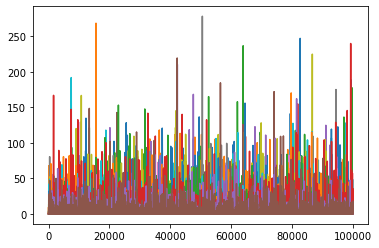

In [220]:
weather.groupby("WindGustDir")["Rainfall"].plot(kind="line")

The wind direction causes more rainfall in different city is ENE

# 6.	Find top 5 coastal cities in which evaporation is higher than mean so that we can choose these places for salt preparation plants?

In [221]:
weather.Evaporation.sort_values(ascending=False).head(15)

29867    145.0
28413     86.2
96990     82.4
23713     81.2
21307     77.3
40508     74.8
19425     72.2
83806     70.4
26499     70.0
94507     68.8
40618     65.8
22742     65.4
94602     64.8
8260      64.4
54132     64.0
Name: Evaporation, dtype: float64

In [222]:
ww=weather[weather["Evaporation"]>=64]

In [223]:
ww

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,windspeed,Frequency,Temp,Humidity,Cloud
8260,2014-01-20,Williamtown,20.5,28.5,0.0,64.4,0.0,SSE,41.0,E,...,4.0,25.6,26.9,No,No,20.0,19.315008,26.25,63.0,3.5
19425,2010-08-02,Woomera,25.7,39.7,0.0,72.2,13.0,SE,50.0,E,...,4.0,31.2,37.9,No,No,17.0,20.238913,34.55,22.0,2.5
21307,2013-12-23,Woomera,14.4,27.2,3.0,77.3,0.0,S,56.0,S,...,7.0,17.0,24.9,Yes,No,28.0,20.238913,20.95,47.5,4.0
22742,2016-03-23,Moree,14.3,31.0,5.8,65.4,11.2,SSE,31.0,E,...,4.0,21.5,29.2,Yes,No,13.0,17.190559,25.35,40.5,2.5
23713,2010-09-01,Woomera,26.6,41.7,0.0,81.2,13.2,N,48.0,NE,...,4.0,33.6,40.3,No,No,18.5,20.238913,36.95,16.0,2.0
26499,2010-01-23,Woomera,17.0,33.1,0.0,70.0,11.7,S,48.0,SSE,...,5.0,19.7,31.0,No,No,27.5,20.238913,25.35,36.0,2.5
28413,2016-11-11,Cobar,19.1,35.3,0.0,86.2,0.0,NNW,35.0,NW,...,7.0,26.7,34.1,No,No,14.0,14.821070,30.40,75.5,7.0
29867,2016-12-19,Williamtown,15.3,23.9,58.2,145.0,0.0,W,35.0,N,...,1.0,19.1,23.0,Yes,No,19.5,19.315008,21.05,62.0,4.5
40508,2017-03-01,NorfolkIsland,19.4,26.1,0.0,74.8,0.0,ENE,30.0,NE,...,8.0,23.4,23.6,No,Yes,13.0,20.960900,23.50,66.5,7.0
40618,2016-11-25,Cobar,8.0,28.0,0.4,65.8,0.0,SW,37.0,S,...,7.0,19.0,26.5,No,No,18.5,14.821070,22.75,75.5,7.0


<AxesSubplot:>

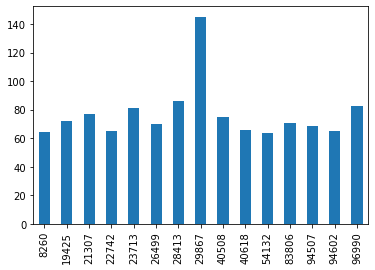

In [224]:
ww.Evaporation.plot(kind="bar")

The top 5 costal cities for salt preparation plants are Williamtown, Cobar, Woomera, NorfolkIsland, Moree

# 7.	Suggest a strategy to a winter goods company to choose the location and months to promote their products.

In [225]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           100000 non-null  datetime64[ns]
 1   Location       100000 non-null  object        
 2   MinTemp        100000 non-null  float64       
 3   MaxTemp        100000 non-null  float64       
 4   Rainfall       100000 non-null  float64       
 5   Evaporation    100000 non-null  float64       
 6   Sunshine       100000 non-null  float64       
 7   WindGustDir    100000 non-null  object        
 8   WindGustSpeed  100000 non-null  float64       
 9   WindDir9am     100000 non-null  object        
 10  WindDir3pm     100000 non-null  object        
 11  WindSpeed9am   100000 non-null  float64       
 12  WindSpeed3pm   100000 non-null  float64       
 13  Humidity9am    100000 non-null  float64       
 14  Humidity3pm    100000 non-null  float64       
 15  P

In [226]:
weather["Month"]=weather["Date"].dt.month

In [227]:
weather["Month"]

0         7
1         4
2         8
3        11
4         7
         ..
99995     1
99996     8
99997    10
99998     6
99999     3
Name: Month, Length: 100000, dtype: int64

In [228]:
weather["Temp"]

0        22.85
1        17.90
2        18.20
3        19.75
4        23.65
         ...  
99995    29.55
99996    14.10
99997    23.30
99998    18.00
99999    18.85
Name: Temp, Length: 100000, dtype: float64

In [229]:
weather["MinTemp"]=weather.groupby("Location")["MinTemp"].transform("mean")

In [230]:
weather["MinTemp"]

0        14.350956
1         9.609181
2        10.071483
3        15.037574
4        20.436849
           ...    
99995    13.059074
99996    11.799316
99997    14.963343
99998    12.945951
99999    12.970627
Name: MinTemp, Length: 100000, dtype: float64

In [231]:
a=weather.groupby(["Location","Month"])["MinTemp"].mean().reset_index()

In [232]:
a

,Location,Month,MinTemp
0,Adelaide,1,12.669505
1,Adelaide,2,12.669505
2,Adelaide,3,12.669505
3,Adelaide,4,12.669505
4,Adelaide,5,12.669505
...,...,...,...
583,Woomera,8,13.352790
584,Woomera,9,13.352790
585,Woomera,10,13.352790
586,Woomera,11,13.352790


In [233]:
a[a["MinTemp"]<7]

,Location,Month,MinTemp
108,Canberra,1,6.778790
109,Canberra,2,6.778790
110,Canberra,3,6.778790
111,Canberra,4,6.778790
112,Canberra,5,6.778790
113,Canberra,6,6.778790
114,Canberra,7,6.778790
115,Canberra,8,6.778790
116,Canberra,9,6.778790
117,Canberra,10,6.778790


The winter goods company can choose both Canberra and MountGinini for all months because of temperature less than 7deg celcius

# 8.	What factors effect tomorrow rain column the most in weather dataset ?

In [234]:
weather["Date_year"]=weather["Date"].dt.year

<AxesSubplot:xlabel='RainTomorrow'>

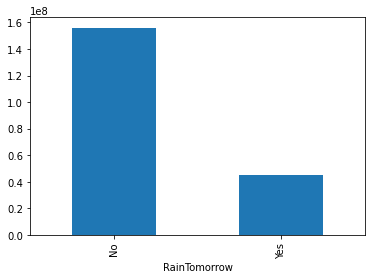

In [235]:
weather.groupby("RainTomorrow")["Date_year"].sum().plot(kind="bar")

<AxesSubplot:ylabel='Rainfall'>

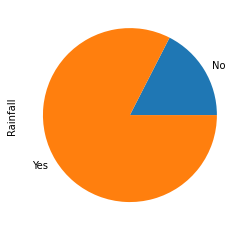

In [236]:
weather.groupby("RainTomorrow")["Rainfall"].mean().plot(kind="pie")

<AxesSubplot:xlabel='RainTomorrow'>

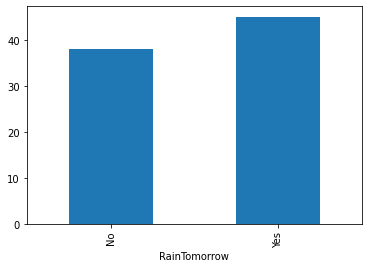

In [237]:
weather.groupby("RainTomorrow")["WindGustSpeed"].mean().plot(kind="bar")

Both Rainfall and WindGustSpeed are the factors that affect Tomorrow rain column

# 9.	Create a new column as rainfall level with values as no, low, medium, high, heavy as categories and do the bivariate analyses between rainfall level and wind direction 
 - no rain    ------> 0 percentile
 -low --------->0-25 percentile
 -medium--------->25-50 percentile
 -high--------->50-75 percentile
 -heavy--------->75-100 percentile


In [152]:
q1=weather["Rainfall"].quantile(0.25)
q2=weather["Rainfall"].quantile(0.50)
q3=weather["Rainfall"].quantile(0.75)

In [299]:
def rain(x):
    if x<0.1:
        return "No Rain"
    elif x>0 and x<q1:
        return "Low"
    elif x>q1 and x<q2:
        return "Medium"
    elif x>q2 and x<q3:
        return "High"
    else:
        return "Heavy"

In [300]:
weather["Rainfall"]

0        2.2
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.8
99999    0.0
Name: Rainfall, Length: 100000, dtype: float64

In [301]:
weather["Rainfall_level"]=weather["Rainfall"].apply(rain)

In [302]:
weather["Rainfall_level"]

0          Heavy
1        No Rain
2        No Rain
3        No Rain
4        No Rain
          ...   
99995    No Rain
99996    No Rain
99997    No Rain
99998      Heavy
99999    No Rain
Name: Rainfall_level, Length: 100000, dtype: object

In [303]:
weather["Rainfall_level"].unique()

array(['Heavy', 'No Rain', 'High'], dtype=object)

For This case the Rainfall under the values 0.1 to q1,q2 and q3 are so here it return the values as High

<AxesSubplot:xlabel='Rainfall_level'>

<Figure size 1008x720 with 0 Axes>

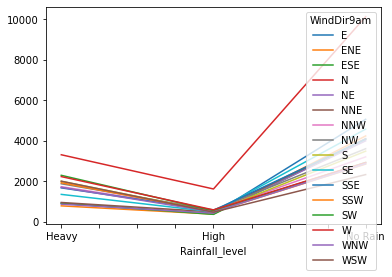

In [306]:
plt.figure(figsize=(14,10))
pd.crosstab(weather["Rainfall_level"],weather["WindDir9am"]).plot(kind="line")

<Figure size 1008x720 with 0 Axes>

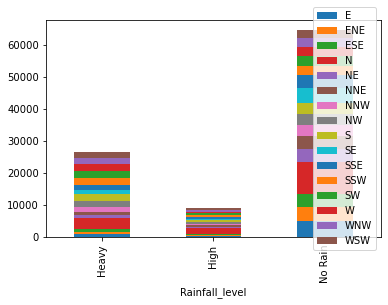

In [308]:
plt.figure(figsize=(14,10))
pd.crosstab(weather["Rainfall_level"],weather["WindDir9am"]).plot(kind="bar",stacked=True,legend=False)
plt.legend(loc="right")

# 10.	Plot the correlation heatmap between the numerical variables.

In [316]:
numerical=weather.select_dtypes(include=np.number)

In [317]:
numerical.drop(["Month","Date_year","Frequency","Temp","Cloud","Humidity"],axis=1,inplace=True)

C:\Users\mutha\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [318]:
numerical

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,windspeed
0,14.350956,25.9,2.2,1.6,0.0,31.0,7.0,19.0,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,13.0
1,9.609181,22.0,0.0,5.4,0.4,44.0,13.0,19.0,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,16.0
2,10.071483,25.7,0.0,4.2,10.9,20.0,7.0,6.0,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,6.5
3,15.037574,22.8,0.0,4.0,0.0,70.0,13.0,43.0,65.0,76.0,1017.0,1010.6,7.0,7.0,18.9,20.6,28.0
4,20.436849,27.2,0.0,6.0,10.2,30.0,7.0,15.0,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13.059074,34.4,0.0,15.6,12.9,44.0,30.0,22.0,19.0,11.0,1011.1,1006.4,1.0,1.0,25.6,33.5,26.0
99996,11.799316,15.9,0.0,3.8,3.8,89.0,57.0,44.0,55.0,46.0,1007.4,1000.7,7.0,7.0,12.7,15.5,50.5
99997,14.963343,26.4,0.0,7.0,5.2,85.0,9.0,13.0,50.0,58.0,1014.3,1014.4,3.0,7.0,25.0,21.6,11.0
99998,12.945951,17.9,0.8,3.8,2.1,35.0,9.0,13.0,99.0,52.0,1029.5,1027.8,7.0,7.0,17.0,19.0,11.0


<AxesSubplot:>

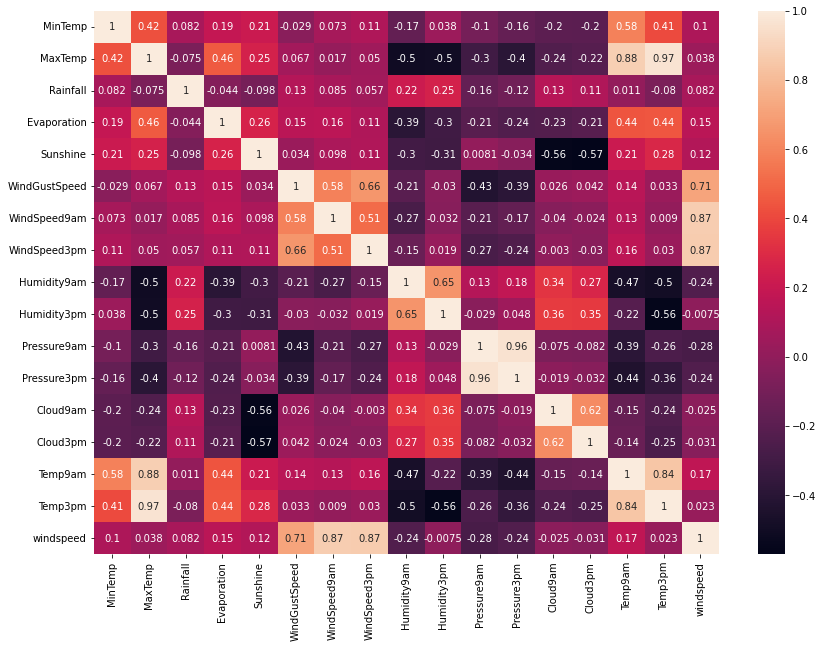

In [319]:
plt.figure(figsize=(14,10))
sns.heatmap(numerical.corr(),annot=True)